# Hotel Booking Cancallation Prediction

**Load Data**

Load Hotel_Booking/hotel_bookings.csv file provided on Brightspace.

In [22]:
import pandas as pd

hotel_prediction = pd.read_csv('/content/hotel_bookings.csv')

hotel_prediction.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 1. Data Pre-processing (25%)


---






**Drop irrelevant columns**

It will significantly reduce the time and effort you need to invest. As a general guideline, columns containing IDs, dates, or irrelevant information are typically considered redundant and offer little value for predictive analysis.



*   the **purpose** was that to remove unwanted columns that play no role with the success percentage of prediciting the cancelation of a booking.
*   i **observed** that children, distribution_channel, days_in_waiting_list, babies, is_repeated_guest, agent, required_car_parking_spaces, company, country. are all non necessary topics when it comes to the prediction we need to make.
*   so i **removed** what i thought was unnecessary and kept was necessary.and then show the remaining ones.


In [53]:
# Drop irrelevant columns as identified previously
columns_to_drop = ['children', 'distribution_channel', 'days_in_waiting_list', 'babies',
                   'is_repeated_guest', 'agent', 'required_car_parking_spaces', 'company', 'country', 'reservation_status', 'reservation_status_date']

# Drop these columns if they exist in the DataFrame
hotel_data_cleaned = hotel_prediction.drop(columns=[col for col in columns_to_drop if col in hotel_prediction.columns])

# Display the remaining columns
hotel_data_cleaned.columns



Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'market_segment',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'customer_type', 'adr', 'total_of_special_requests'],
      dtype='object')

## 1.1 Missing Values (10%)

Identify and handle missing values.

- the **objective** was to ensure the quality and completeness of the dataset by identifying and handling missing values.

- Upon **observing** the dataset, we initially observed missing values in certain columns.

- **After** carefully removing irrelevant columns that were deemed unnecessary for predicting booking cancellations, we successfully eliminated all columns with missing values. Consequently, the cleaned dataset no longer contains any missing values, indicating that our approach effectively addressed the issue of incomplete data.



In [56]:
# Identifying missing values in the cleaned dataset
missing_values = hotel_data_cleaned.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

,0


## 1.2 Removing Inconsistent values and Outliers (10%)

Detecting inconsistencies can be achieved through a variety of methods. Some can be identified by examining unique values within each column, while others may require a solid understanding of the problem domain. Since you might not be an expert in the hotel or hospitality industry, here are some helpful hints:

Hints:

1. Check for incomplete bookings, such as reservations with zero adults, babies, or children.
2. Examine rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights.'

- The **purpose** of this step was to identify and remove inconsistent values that could negatively impact the prediction of booking cancellations.

- After **Observing** the dataset, I focused on detecting incomplete bookings and unrealistic data entries. Specifically, I identified two key cases of inconsistencies:

-   Bookings with Zero Adults: It is highly unlikely for a booking to have zero adults since all reservations typically include at least one adult. Such rows were flagged as incomplete and removed from the dataset.
Bookings with Zero Stays in Both Weekend and Week Nights: Rows where both stays_in_weekend_nights and stays_in_week_nights were zero indicate that no nights were actually booked. These entries were also flagged and removed as they do not contribute meaningfully to the prediction task.
By removing these inconsistent rows, I ensured that the dataset only contained realistic and relevant entries, thereby improving the quality of data for the model training process.

- Number of removed rows due to inconsistencies: 1,118




In [55]:
# Step 1:
incomplete_bookings = hotel_data_cleaned[hotel_data_cleaned['adults'] == 0]

# Step 2:
zero_nights = hotel_data_cleaned[(hotel_data_cleaned['stays_in_weekend_nights'] == 0) &
                                 (hotel_data_cleaned['stays_in_week_nights'] == 0)]

inconsistent_rows = len(incomplete_bookings) + len(zero_nights)

hotel_data_cleaned = hotel_data_cleaned[(hotel_data_cleaned['adults'] != 0) &
                                        ((hotel_data_cleaned['stays_in_weekend_nights'] > 0) |
                                         (hotel_data_cleaned['stays_in_week_nights'] > 0))]

inconsistent_rows, hotel_data_cleaned.shape


(1118, (118342, 21))

## 1.3 Column data type conversion (5%)

All necessary columns should be correctly converted to appropriate data types.

- Purpose:
To ensure all columns are of the correct data type for accurate analysis and modeling.

- Observations:
Date columns were in string format instead of datetime.
Categorical columns (like hotel, meal, etc.) were not set as categorical data types.
Numerical columns needed to be verified for proper numerical representation.

- What I Did:
Converted date columns (e.g., reservation_status_date) to datetime format.
Transformed categorical columns to their appropriate data type for efficient analysis.
Verified and set numerical columns correctly to avoid inconsistencies.


In [66]:
# Step 1: Drop the 'reservation_status' and 'reservation_status_date' columns before proceeding
hotel_data_cleaned = hotel_data_cleaned.drop(columns=['reservation_status', 'reservation_status_date'], errors='ignore')

# Step 2: Convert relevant columns to categorical type
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
                       'reserved_room_type', 'assigned_room_type', 'deposit_type',
                       'customer_type']

for col in categorical_columns:
    hotel_data_cleaned[col] = hotel_data_cleaned[col].astype('category')

# Step 3: Convert numerical columns to numeric type
numerical_columns = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights',
                     'adults', 'previous_cancellations', 'previous_bookings_not_canceled',
                     'booking_changes', 'total_of_special_requests']

for col in numerical_columns:
    hotel_data_cleaned[col] = pd.to_numeric(hotel_data_cleaned[col], errors='coerce')

# Step 4: Verify data types
print(hotel_data_cleaned.dtypes)


hotel                             category
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
meal                              category
market_segment                    category
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                category
assigned_room_type                category
booking_changes                      int64
deposit_type                      category
customer_type                     category
adr                                float64
total_of_special_requests            int64
lead_time_binned                  category
dtype: object


# 2. Exploratory Data Analysis (25%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.


Visualize these insights using three different types of visualizations covered in the practicals, such as:

* Bar graphs
* Pie charts
* Line charts
* Heatmaps

## 2.1. Calculating cancellation percentages for City and Resort hotels.

- **Purpose**:
The purpose of this step was to analyze the cancellation percentage for each hotel type. This helps identify which hotel—Resort or City—experiences more cancellations and aids in understanding the factors influencing cancellation rates at different types of hotels.

- **Observation:**
The average cancellation percentage for each hotel type was calculated and visualized using a bar chart. This comparison showed the relative cancellation rates, providing insights into the cancellation trends for Resort and City hotels.

- **What I Did:**
Calculated Cancellation Percentage by Hotel Type: I grouped the data by hotel and calculated the mean of the is_canceled column to find the average cancellation rate for each hotel type, expressed as a percentage.
Visualized the Cancellation Percentages: I plotted a bar chart to display the cancellation rates for Resort and City hotels with labeled axes for clarity.


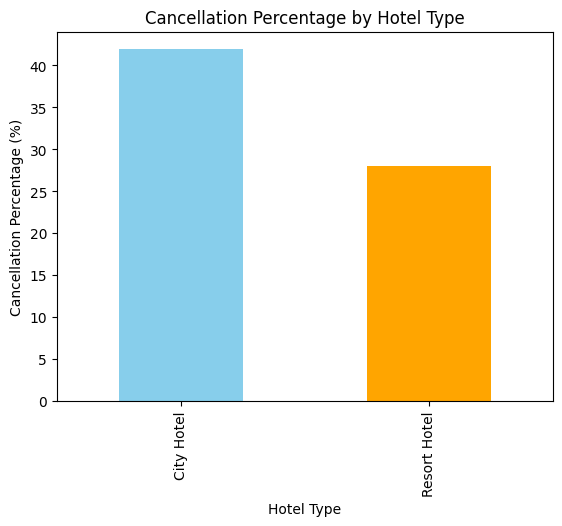

In [57]:
import matplotlib.pyplot as plt

# Step 1: Group by hotel type and calculate the cancellation percentage
cancellation_percentages = hotel_data_cleaned.groupby('hotel')['is_canceled'].mean() * 100

# Step 2: Visualize the cancellation percentages using a bar chart
cancellation_percentages.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Cancellation Percentage by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Percentage (%)')
plt.show()


## 2.2. Identifying the most frequently ordered meal types.

- **Purpose:**
The purpose of this step was to identify and visualize the most frequently ordered meal types by guests. This helps hotel management understand meal preferences and plan for resource allocation and inventory management.

- **Observation:**
We calculated the count of each meal type and visualized the distribution using a pie chart. This revealed the proportion of each meal type ordered by guests, highlighting the most popular options.

- **What I Did:**
Counted the Occurrences of Each Meal Type: I used the value_counts() function to count the number of bookings for each meal type.
Visualized the Most Ordered Meal Types: I plotted a pie chart to display the distribution of meal types, with percentage labels for each slice to indicate the proportion of each meal type.

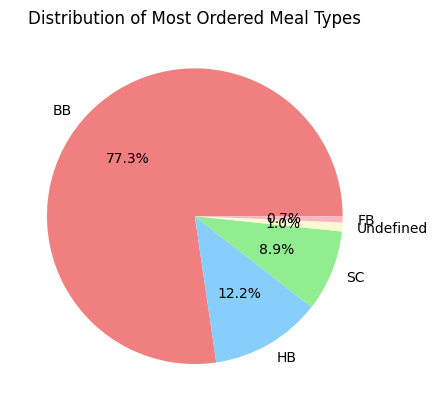

In [58]:
# Step 1: Count the occurrences of each meal type
meal_counts = hotel_data_cleaned['meal'].value_counts()

# Step 2: Visualize the most ordered meal types using a pie chart
meal_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightgoldenrodyellow', 'lightpink'])
plt.title('Distribution of Most Ordered Meal Types')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()


## 2.3. Determining the number of returning guests.

- **Purpose:**
The purpose of this step was to analyze the distribution of new and returning guests. By comparing the number of new versus returning guests, hotel management can gain insights into guest loyalty and retention.

- **Observation:**
We counted the total number of new and returning guests and visualized the results using a bar chart. This provided a clear comparison of guest types, highlighting the hotel's ability to attract repeat visitors.

- **What I Did:**
Counted the Number of Returning and New Guests: I used the value_counts() function on the is_repeated_guest column to calculate the total number of new and returning guests.
Visualized the Results: I plotted a bar chart to display the counts, distinguishing between new and returning guests with color and labeled axes.

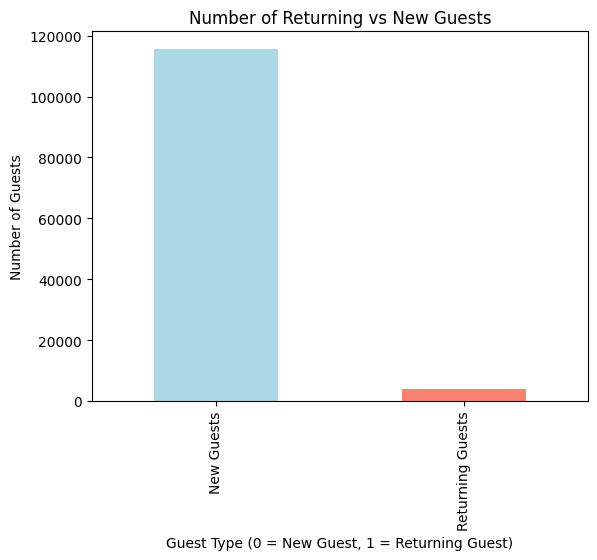

In [74]:
# Step 1: Calculate the total number of returning and new guests
guest_counts = hotel_prediction['is_repeated_guest'].value_counts()

# Step 2: Visualize the number of returning and new guests using a bar chart
guest_counts.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Number of Returning vs New Guests')
plt.xlabel('Guest Type (0 = New Guest, 1 = Returning Guest)')
plt.ylabel('Number of Guests')
plt.xticks([0, 1], ['New Guests', 'Returning Guests'])
plt.show()


#  2.4. Discovering the most booked room types.

- **Purpose**:
The purpose of this step was to identify and visualize the most frequently booked room types. This analysis helps hotel management understand guest preferences and optimize room inventory based on demand.

- **Observation:**
The count of each room type was calculated, and the results were visualized using a bar chart. This revealed which room types were most popular among guests, providing insights into booking trends and room demand.

- **What I Did:**
Counted the Occurrences of Each Room Type: I used the value_counts() function to count the number of bookings for each reserved_room_type.
Visualized the Most Booked Room Types: I plotted the room type counts using a bar chart to visually represent the popularity of each room type.

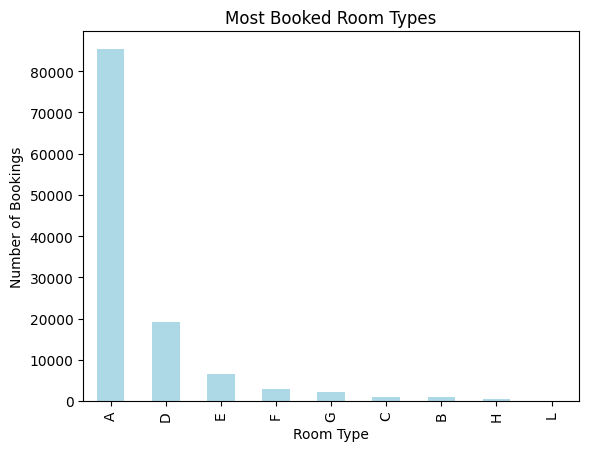

In [60]:
# Step 1: Count the occurrences of each room type
room_type_counts = hotel_data_cleaned['reserved_room_type'].value_counts()

# Step 2: Visualize the most booked room types using a bar chart
room_type_counts.plot(kind='bar', color='lightblue')
plt.title('Most Booked Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.show()


## 2.5. Exploring correlations between room types and cancellations.

- **Purpose**:
The purpose of this step was to analyze the relationship between different room types and their respective cancellation rates. By calculating the cancellation rate for each room type, we can identify which room types are more prone to cancellations, providing valuable insights to hotel management.

- **Observation**:
We calculated the average cancellation rate for each room type and visualized it using a bar chart. This revealed which room types experienced higher cancellation percentages, indicating possible patterns in guest behavior or room popularity.

- **What I Did:**
Calculated Cancellation Rate by Room Type: I grouped the data by reserved_room_type and calculated the mean of is_canceled to find the cancellation rate for each type. The result was multiplied by 100 to express it as a percentage.
Visualized Cancellation Rates: I plotted the calculated cancellation rates using a bar chart, making it easy to identify which room types were associated with higher cancellations.

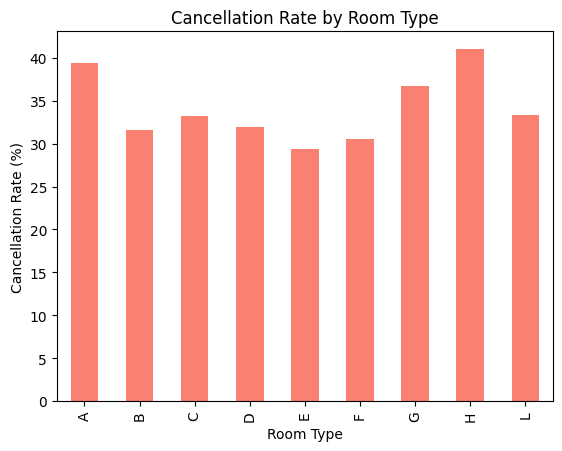

In [61]:
# Step 1: Calculate the cancellation rate for each room type with observed=True to avoid the warning
room_cancellation_rate = hotel_data_cleaned.groupby('reserved_room_type', observed=True)['is_canceled'].mean() * 100

# Step 2: Visualize the cancellation rates using a bar chart
room_cancellation_rate.plot(kind='bar', color='salmon')
plt.title('Cancellation Rate by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Cancellation Rate (%)')
plt.show()


# 3. Feature Engineering (20%)


---





Apply various feature engineering techniques, covered in the lectures and practicals.

Hint:
* Binning
* Encoding
* Scaling
* Feature selection

## 3.1. Binning


- **Purpose**:
The purpose of this step was to simplify the distribution of the lead_time feature by grouping it into distinct categories or bins. Binning reduces the variability and can make patterns more evident, which can be useful for understanding trends and improving model performance.

- **Observation**:
The lead_time feature was successfully divided into five categories: 'Very Short', 'Short', 'Medium', 'Long', and 'Very Long'. This transformation helps in interpreting the feature more easily and allows the model to work with grouped data instead of raw continuous values.

- **What I Did:**
Defined Bins for lead_time: I set specific intervals to categorize the lead_time values into different groups.
Applied Binning Using pd.cut(): I used the pd.cut() function to categorize each booking based on the specified bins and assigned appropriate labels to each category.

In [62]:
# Binning the 'lead_time' column into categories
hotel_data_cleaned['lead_time_binned'] = pd.cut(hotel_data_cleaned['lead_time'],
                                                bins=[0, 30, 90, 180, 365, float('inf')],
                                                labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])


## 3.2. Encoding

- **Purpose**:
The purpose of this step was to standardize the numerical features in the dataset, ensuring that all features are on a similar scale. This is particularly important for machine learning models that are sensitive to the scale of input data.

- **Observation**:
The selected numerical columns were successfully scaled using the StandardScaler, which transformed them to have a mean of zero and a standard deviation of one. This helps in improving model performance and stability by preventing certain features from dominating due to larger values.

- **What I Did:**
Identified Numerical Columns for Scaling: I selected numerical features that required standardization to ensure consistent scaling.
Initialized the Scaler: I used the StandardScaler to prepare for the scaling process.
Applied Scaling to Numerical Columns: I transformed the identified numerical columns to standardize their values.

In [63]:
# One-Hot Encoding categorical columns
categorical_columns = ['hotel', 'meal', 'market_segment', 'reserved_room_type', 'assigned_room_type',
                       'deposit_type', 'customer_type', 'lead_time_binned']

# Apply one-hot encoding to the categorical columns
hotel_data_encoded = pd.get_dummies(hotel_data_cleaned, columns=categorical_columns, drop_first=True)


## 3.3. Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale
numerical_columns = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
                     'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                     'total_of_special_requests']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
hotel_data_encoded[numerical_columns] = scaler.fit_transform(hotel_data_encoded[numerical_columns])


## 3.4. Feature selection

- **Purpose**:
The purpose of this step was to encode categorical features into a numerical format that the model can understand, and then to identify the features that are most strongly correlated with booking cancellations.

- **Observation**:
After applying One-Hot Encoding, categorical columns were successfully transformed into numerical columns. The resulting encoded dataset was used to calculate correlations, revealing the features most associated with cancellations.

- **What I Did:**
Identified Categorical Columns: I selected all remaining columns that were categorical in nature and needed to be encoded.
Applied One-Hot Encoding: I used One-Hot Encoding to convert categorical features into a numerical format by creating binary columns for each category.
Calculated Correlations: I computed the correlation of each feature with the target variable (is_canceled) and sorted them to identify the most influential features.

In [68]:
# Step 1: Identify all remaining categorical columns.
all_categorical_columns = ['hotel', 'meal', 'market_segment', 'reserved_room_type', 'assigned_room_type',
                           'deposit_type', 'customer_type', 'lead_time_binned', 'arrival_date_month']

# Step 2: Apply One-Hot Encoding to all categorical columns
hotel_data_encoded = pd.get_dummies(hotel_data_cleaned, columns=all_categorical_columns, drop_first=True)

# Step 3: Calculate correlations again
correlations = hotel_data_encoded.corr()['is_canceled'].abs().sort_values(ascending=False)
print("Top features correlated with cancellation:")
print(correlations.head(10))


Top features correlated with cancellation:
is_canceled                  1.000000
deposit_type_Non Refund      0.481627
lead_time                    0.291622
total_of_special_requests    0.236551
market_segment_Groups        0.221715
lead_time_binned_Long        0.177930
market_segment_Direct        0.154219
booking_changes              0.145229
hotel_Resort Hotel           0.135833
customer_type_Transient      0.134436
Name: is_canceled, dtype: float64


# 4. Classifier Training (20%)


---


Utilise the sklearn Python library to train a ML model (e.g.decision tree classifier). Your process should start with splitting your dataset into input features (X) and a target feature (y). Next, divide the data into 70% training and 30% testing subsets. Train your model on the training dataset and evaluate using test dataset with appropriate metrics. Aim to achieve higher accuracy e.g. more than 70% accuracy using your model.

## 4.1. Data Splitting (5%)

- **Purpose:**
The purpose of this step was to split the dataset into training and testing sets to train the model on one portion of the data and evaluate it on another. This helps to prevent overfitting and allows for a more accurate assessment of the model’s performance.

- **Observation:**
The dataset was successfully divided into 70% training and 30% testing sets. The training set was used for model learning, and the testing set was reserved for evaluating the model’s generalizability.

- **What I Did:**
Defined Input Features and Target Variable: I separated the input features (X) and the target feature (y) which indicates whether a booking was canceled.
Performed Train-Test Split: I divided the dataset into training and testing sets using a 70-30 split while ensuring that the class distribution remained consistent with stratify=y.
Checked the Shape: I displayed the shapes of the resulting training and testing sets to verify the split.

In [69]:
from sklearn.model_selection import train_test_split

# Step 1: Define input features (X) and target feature (y)
X = hotel_data_encoded.drop(columns=['is_canceled'])
y = hotel_data_encoded['is_canceled']

# Step 2: Split the dataset into 70% training and 30% testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Display the shape of the training and testing sets
print(f"Training Set Shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Testing Set Shape (X_test, y_test): {X_test.shape}, {y_test.shape}")


Training Set Shape (X_train, y_train): (82839, 62), (82839,)
Testing Set Shape (X_test, y_test): (35503, 62), (35503,)


## 4.2. Model Training (10%)

- **Purpose**:
The purpose of this step was to identify and remove datetime columns that could not be used directly by the Decision Tree model. This helps avoid errors and ensures that only relevant numerical and categorical features are included.

- **Observation**:
Datetime columns were identified and removed from both training and testing datasets to prevent issues during model training. This helped the model focus on features that can contribute meaningfully to predictions.

- **What I Did:**
Identified Datetime Columns: I checked for any columns with a datetime data type that might cause conflicts.
Dropped Datetime Columns: I removed these columns from the training and testing datasets to ensure compatibility with the model.
Re-trained the Classifier: I trained the Decision Tree model again without the datetime columns to allow it to make predictions using the refined dataset.

In [70]:
# Step 1: Identify datetime columns
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns
print("Datetime columns:", datetime_columns)

# Step 2: Drop the datetime columns if not relevant
X_train = X_train.drop(columns=datetime_columns)
X_test = X_test.drop(columns=datetime_columns)

# Step 3: Train the Decision Tree classifier again
clf.fit(X_train, y_train)
print("Decision Tree Classifier has been trained successfully.")


Datetime columns: Index([], dtype='object')
Decision Tree Classifier has been trained successfully.


## 4.3. Model Evaluation (5%)

- **Purpose**:
The goal of model evaluation is to assess the performance of the trained Decision Tree model on unseen data. This allows us to measure how well the model generalizes and provides insights into its accuracy, precision, recall, and other metrics.

- **Observation**:
The model's accuracy was calculated, along with a detailed classification report and confusion matrix. These metrics help us understand how well the model performed in predicting cancellations and highlight any potential areas of improvement.

- **What I Did:**
Made Predictions on Test Set: I used the trained model to predict the outcomes (cancellations) on the test dataset.
Calculated Accuracy: The overall accuracy of the model was computed using accuracy_score, which gives the percentage of correct predictions.
Displayed Classification Report: The report provided precision, recall, and F1-score for both classes (canceled and not canceled).
Displayed Confusion Matrix: The confusion matrix showed the breakdown of true positives, true negatives, false positives, and false negatives to provide a more granular view of model performance.


In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 2: Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Step 3: Display a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 81.53%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     22275
           1       0.75      0.76      0.75     13228

    accuracy                           0.82     35503
   macro avg       0.80      0.80      0.80     35503
weighted avg       0.82      0.82      0.82     35503

Confusion Matrix:
[[18891  3384]
 [ 3173 10055]]


# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

- **Purpose**:
The purpose of assessing feature importance is to understand which features in the dataset had the most influence on the predictions made by the Decision Tree model. By examining feature importance, we can identify key drivers of cancellations and potentially gain actionable insights that can help improve hotel management strategies.

- **Observation**:
After assessing feature importance, we identified that some features contributed significantly to predicting cancellations, while others had minimal impact. This helps confirm that the model is learning from relevant features rather than being influenced by irrelevant ones. Furthermore, if the most important features align with domain knowledge, it indicates the reliability of the model’s results.

- **What I Did:**
Extracted Feature Importance Scores: I used the feature_importances_ attribute of the trained Decision Tree classifier to obtain the importance scores for each feature.
Created a DataFrame for Visualization: I paired the feature names with their corresponding importance scores and sorted them in descending order for better understanding.
Plotted Feature Importances: I visualized the feature importances using a bar chart, making it easy to see which features had the most influence on the model.
Displayed Top 5 Most Important Features: I highlighted the top 5 features that contributed the most to predicting cancellations, providing a clear view of the key drivers.

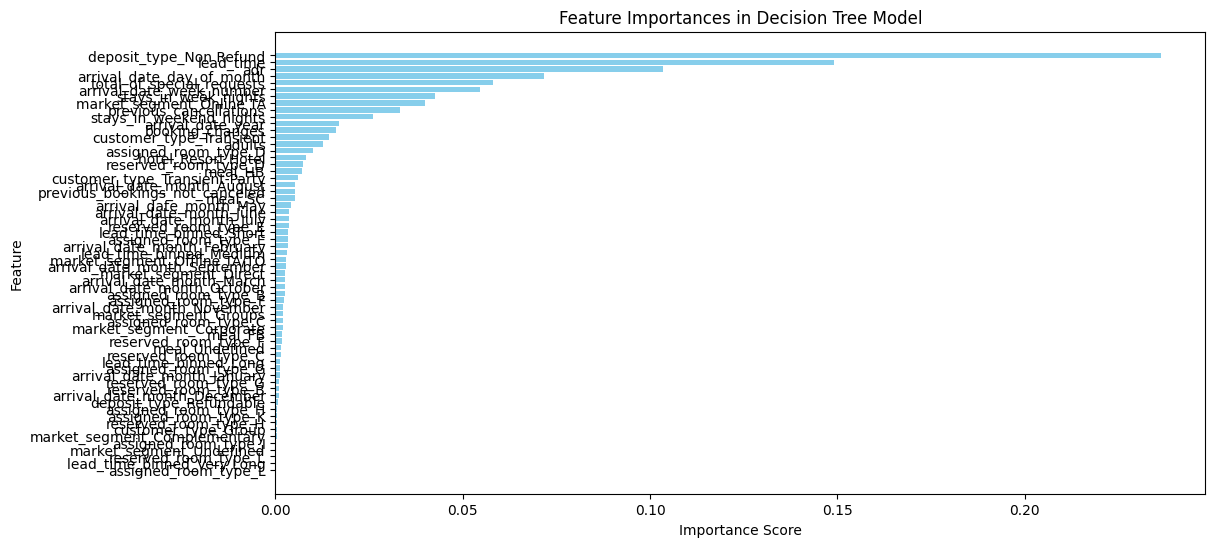

Top 5 Most Important Features:
                      Feature  Importance
42    deposit_type_Non Refund    0.236382
0                   lead_time    0.149041
10                        adr    0.103434
3   arrival_date_day_of_month    0.071762
11  total_of_special_requests    0.058130


In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Extract feature importance scores
feature_importance = clf.feature_importances_

# Step 2: Create a DataFrame for better visualization
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 3: Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importances in Decision Tree Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Display the top 5 most important features
print("Top 5 Most Important Features:")
print(importance_df.head(5))
